In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# 1. Obtention des données
## Chargement des fichiers
On charge ici tous les fichiers de l'export (préalablement compressés pour préserver la place sur le disque)

In [3]:
analyses_orthophosphate = pd.read_csv("./naiades_export_orthophosphate/Analyses.CSV",sep=";",parse_dates=["DatePrel"])

In [4]:
pd.set_option('display.max_columns', None)
analyses_orthophosphate.columns


Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface', 'CdSupport',
       'LbSupport', 'CdFractionAnalysee', 'LbFractionAnalysee',
       'CdPrelevement', 'DatePrel', 'HeurePrel', 'DateAna', 'HeureAna',
       'CdParametre', 'LbLongParamètre', 'RsAna', 'CdUniteMesure',
       'SymUniteMesure', 'CdRqAna', 'MnemoRqAna', 'CdInsituAna', 'LbInsituAna',
       'ProfondeurPrel', 'CdDifficulteAna', 'MnemoDifficulteAna', 'LdAna',
       'LqAna', 'LsAna', 'IncertAna', 'CdMetFractionnement',
       'NomMetFractionnement', 'CdMethode', 'NomMethode', 'RdtExtraction',
       'CdMethodeExtraction', 'NomMethodeExtraction', 'CdAccreAna',
       'MnemoAccredAna', 'AgreAna', 'CdStatutAna', 'MnemoStatutAna',
       'CdQualAna', 'LbQualAna', 'CommentairesAna', 'ComResultatAna', 'CdRdd',
       'NomRdd', 'CdProducteur', 'NomProducteur', 'CdPreleveur',
       'NomPreleveur', 'CdLaboratoire', 'NomLaboratoire'],
      dtype='object')

In [5]:
analyses_orthophosphate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9729 entries, 0 to 9728
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CdStationMesureEauxSurface  9729 non-null   int64         
 1   LbStationMesureEauxSurface  9729 non-null   object        
 2   CdSupport                   9729 non-null   int64         
 3   LbSupport                   9729 non-null   object        
 4   CdFractionAnalysee          9729 non-null   int64         
 5   LbFractionAnalysee          9729 non-null   object        
 6   CdPrelevement               9729 non-null   int64         
 7   DatePrel                    9729 non-null   datetime64[ns]
 8   HeurePrel                   9724 non-null   object        
 9   DateAna                     9710 non-null   object        
 10  HeureAna                    9524 non-null   object        
 11  CdParametre                 9729 non-null   int64       

In [6]:
analyses_orthophosphate = analyses_orthophosphate[pd.to_datetime(analyses_orthophosphate['DatePrel']).dt.year != 2022]
analyses_orthophosphate = analyses_orthophosphate[pd.to_datetime(analyses_orthophosphate['DatePrel']).dt.year != 2023]

In [7]:
new_df = analyses_orthophosphate.loc[:, ['CdStationMesureEauxSurface', 'CdPrelevement', 'RsAna', 'DatePrel']]
print(new_df)


      CdStationMesureEauxSurface  CdPrelevement  RsAna   DatePrel
0                        2000003        6994353  0.430 2020-02-03
1                        2000003        7027672  0.353 2020-05-25
2                        2000003        7031837  1.470 2020-07-20
3                        2000003        7035763  9.497 2020-09-14
4                        2000003        7037335  4.601 2020-11-09
...                          ...            ...    ...        ...
9708                     6455540         740681  0.150 2019-03-06
9725                     6455540         823738  0.430 2020-12-02
9726                     6455540         823740  0.640 2020-06-04
9727                     6455540         823929  0.190 2020-03-05
9728                     6455540         823930  0.360 2020-09-09

[9658 rows x 4 columns]


In [8]:
new_df['Month'] = pd.to_datetime(new_df['DatePrel']).dt.month
new_df['Year'] = pd.to_datetime(new_df['DatePrel']).dt.year

new_df = new_df.dropna(subset=['RsAna'])
preprocess_df = new_df.drop(columns=['CdPrelevement', 'DatePrel'])
# Remove stations with less than 15 rows


In [9]:

df = px.data.tips()
fig = px.box(preprocess_df.groupby('CdStationMesureEauxSurface').size().sort_values(ascending=False))
fig.show()
station_counts = preprocess_df.groupby('CdStationMesureEauxSurface').size().sort_values(ascending=False)
station_counts

CdStationMesureEauxSurface
2001050    78
2001700    78
2096480    40
2043750    40
2001500    40
           ..
2035750     1
2035500     1
2032800     1
2044400     1
2041850     1
Length: 395, dtype: int64

In [10]:

preprocess_df = preprocess_df.groupby('CdStationMesureEauxSurface').filter(lambda x: len(x) > 33 and len(x) <= 50)


In [11]:
station_counts = preprocess_df.groupby('CdStationMesureEauxSurface').size().sort_values(ascending=False)
station_counts


CdStationMesureEauxSurface
2095600    40
2001500    40
2043750    40
2096480    40
2094973    40
           ..
2043775    34
2048960    34
2080200    34
2084200    34
2000010    34
Length: 206, dtype: int64

In [12]:
df = px.data.tips()
fig = px.box(preprocess_df.groupby('CdStationMesureEauxSurface').size().sort_values(ascending=False))
fig.show()

In [13]:
# IDs of the I2M2 stations
station_id_check = [2001000, 2001006, 2001025, 2001030, 2001500, 2001738, 2001750,
       2002000, 2002800, 2003100, 2003200, 2003350, 2003400, 2003670,
       2003800, 2004000, 2004300, 2005700, 2007000, 2009000, 2009085,
       2010000, 2011000, 2013000, 2015500, 2016050, 2017000, 2017850,
       2018000, 2018500, 2018780, 2019000, 2020000, 2021000, 2022675,
       2023000, 2024000, 2025100, 2025200, 2025700, 2026200, 2026500,
       2028000, 2028300, 2028500, 2029000, 2029160, 2030200, 2030500,
       2031400, 2031650, 2032000, 2035000, 2036000, 2037400, 2037500,
       2041000, 2041230, 2041650, 2041750, 2041950, 2042000, 2042050,
       2043017, 2043500, 2043600, 2043655, 2043750, 2044100, 2044400,
       2045000, 2045050, 2045150, 2045200, 2045283, 2045350, 2045500,
       2046000, 2046550, 2047000, 2047500, 2047750, 2048960, 2048980,
       2049000, 2049500, 2049900, 2050000, 2051500, 2051600, 2051820,
       2052000, 2052500, 2054900, 2055100, 2057480, 2061500, 2061970,
       2063000, 2064770, 2065090, 2065280, 2065500, 2068700, 2068790,
       2068800, 2070500, 2080200, 2080500, 2081000, 2081030, 2081100,
       2081300, 2082350, 2082845, 2082970, 2084100, 2084650, 2084800,
       2089000, 2093170, 2093600, 2094000, 2094500, 2094700, 2094800,
       2094920, 2094930, 2094940, 2094950, 2094973, 2094979, 2096480,
       2096500, 2096520, 2096900, 2096975, 2097000, 2098200, 2098800,
       2098980, 2099550, 2099800, 2100100, 2100603, 2100830, 2101050,
       2103800, 2103850, 2103950, 2104000, 2104400, 2105000, 2106430,
       2106665, 2106750, 2106800, 2106850, 2106862, 2106900, 2107600,
       6000990, 6001312, 6001313, 6001314, 6001316, 6408800, 6455540]

In [14]:
preprocess_df['CdStationMesureEauxSurface'].unique()

array([2000010, 2000011, 2000990, 2001000, 2001016, 2001025, 2001030,
       2001500, 2001715, 2001725, 2001738, 2001750, 2002000, 2003100,
       2003200, 2003350, 2003400, 2003800, 2004000, 2004300, 2005700,
       2007000, 2009000, 2010000, 2011000, 2013000, 2016050, 2017000,
       2018000, 2018500, 2018780, 2019000, 2019500, 2020000, 2021000,
       2022000, 2022650, 2022700, 2022800, 2023000, 2024000, 2025500,
       2025700, 2026200, 2026250, 2026500, 2027000, 2028000, 2028500,
       2029000, 2029160, 2030200, 2030310, 2030350, 2030450, 2030500,
       2031400, 2031650, 2032000, 2035000, 2036000, 2036250, 2036265,
       2037000, 2037335, 2037350, 2037400, 2037450, 2037472, 2037500,
       2038000, 2041000, 2041230, 2041650, 2041735, 2041750, 2041950,
       2042000, 2042500, 2043350, 2043500, 2043600, 2043725, 2043750,
       2043775, 2044000, 2044300, 2045000, 2045050, 2045150, 2045200,
       2045283, 2045500, 2046000, 2046500, 2046800, 2047000, 2047500,
       2047750, 2048

In [15]:
station_ortho_check = [2000010, 2000011, 2000990, 2001000, 2001016, 2001025, 2001030,
       2001500, 2001715, 2001725, 2001738, 2001750, 2002000, 2003100,
       2003200, 2003350, 2003400, 2003800, 2004000, 2004300, 2005700,
       2007000, 2009000, 2010000, 2011000, 2013000, 2016050, 2017000,
       2018000, 2018500, 2018780, 2019000, 2019500, 2020000, 2021000,
       2022000, 2022650, 2022700, 2022800, 2023000, 2024000, 2025500,
       2025700, 2026200, 2026250, 2026500, 2027000, 2028000, 2028500,
       2029000, 2029160, 2030200, 2030310, 2030350, 2030450, 2030500,
       2031400, 2031650, 2032000, 2035000, 2036000, 2036250, 2036265,
       2037000, 2037335, 2037350, 2037400, 2037450, 2037472, 2037500,
       2038000, 2041000, 2041230, 2041650, 2041735, 2041750, 2041950,
       2042000, 2042500, 2043350, 2043500, 2043600, 2043725, 2043750,
       2043775, 2044000, 2044300, 2045000, 2045050, 2045150, 2045200,
       2045283, 2045500, 2046000, 2046500, 2046800, 2047000, 2047500,
       2047750, 2048960, 2048980, 2049000, 2049500, 2049900, 2050000,
       2051000, 2051600, 2051820, 2052000, 2052500, 2054000, 2054100,
       2054500, 2057060, 2057065, 2057100, 2057150, 2057210, 2057250,
       2057400, 2061500, 2061970, 2063000, 2064000, 2064770, 2065090,
       2065280, 2065500, 2068800, 2068900, 2070500, 2079000, 2079250,
       2079500, 2080200, 2081000, 2081100, 2081135, 2081300, 2081500,
       2081700, 2081850, 2082350, 2082710, 2082900, 2082970, 2084000,
       2084100, 2084200, 2084400, 2089000, 2089900, 2090000, 2092000,
       2093100, 2093170, 2093200, 2093600, 2094000, 2094500, 2094700,
       2094800, 2094900, 2094920, 2094930, 2094950, 2094973, 2094979,
       2095500, 2095600, 2096000, 2096400, 2096480, 2096500, 2096750,
       2096900, 2096950, 2096975, 2097000, 2098200, 2098800, 2099500,
       2099800, 2100150, 2100190, 2100603, 2100830, 2101050, 2103800,
       2103850, 2103950, 2104000, 2104400, 2104800, 2105000, 2106220,
       2106230, 2106380, 2106410, 2106430, 2106435, 2106750, 2106800,
       2106850, 2106900, 2107600]

In [16]:
# How many stations are common to the two datasets
shared_station= set(station_id_check) & set(station_ortho_check)

In [17]:
preprocess_df = preprocess_df[preprocess_df['CdStationMesureEauxSurface'].isin(shared_station)]


In [18]:
preprocess_df

,CdStationMesureEauxSurface,RsAna,Month,Year
123,2001000,0.071,11,2018
124,2001000,0.241,12,2018
125,2001000,0.078,1,2019
126,2001000,0.040,2,2019
127,2001000,0.055,3,2019
...,...,...,...,...
9534,2107600,0.190,9,2021
9535,2107600,0.219,10,2021
9536,2107600,0.309,11,2021
9537,2107600,0.153,11,2021


In [19]:
preprocess_df['CdStationMesureEauxSurface'].unique()

array([2001000, 2001025, 2001030, 2001500, 2001738, 2001750, 2002000,
       2003100, 2003200, 2003350, 2003400, 2003800, 2004000, 2004300,
       2005700, 2007000, 2009000, 2010000, 2011000, 2013000, 2016050,
       2017000, 2018000, 2018500, 2018780, 2019000, 2020000, 2021000,
       2023000, 2024000, 2025700, 2026200, 2026500, 2028000, 2028500,
       2029000, 2029160, 2030200, 2030500, 2031400, 2031650, 2032000,
       2035000, 2036000, 2037400, 2037500, 2041000, 2041230, 2041650,
       2041750, 2041950, 2042000, 2043500, 2043600, 2043750, 2045000,
       2045050, 2045150, 2045200, 2045283, 2045500, 2046000, 2047000,
       2047500, 2047750, 2048960, 2048980, 2049000, 2049500, 2049900,
       2050000, 2051600, 2051820, 2052000, 2052500, 2061500, 2061970,
       2063000, 2064770, 2065090, 2065280, 2065500, 2068800, 2070500,
       2080200, 2081000, 2081100, 2081300, 2082350, 2082970, 2084100,
       2089000, 2093170, 2093600, 2094000, 2094500, 2094700, 2094800,
       2094920, 2094

In [20]:
# Filter the dataframe based on the date range
filtered_df = preprocess_df[((preprocess_df['Year'] >= 2020) & (preprocess_df['Month'] >= 1)) & ((preprocess_df['Year'] <= 2021) & (preprocess_df['Month'] <= 7))]

# Group the data by station and create a list of lists
result = filtered_df.groupby('CdStationMesureEauxSurface').apply(lambda x: {'Station': x['CdStationMesureEauxSurface'].iloc[0], 'Series': x['RsAna'].tolist()}).tolist()
result


[{'Station': 2001000,
  'Series': [0.116,
   0.156,
   0.025,
   0.136,
   0.081,
   0.068,
   0.177,
   0.087,
   0.182,
   0.272,
   0.118,
   0.157,
   0.33]},
 {'Station': 2001025,
  'Series': [0.236,
   0.232,
   0.268,
   0.218,
   0.432,
   0.521,
   0.335,
   0.105,
   0.136,
   0.523,
   0.143,
   0.115,
   0.245]},
 {'Station': 2001030,
  'Series': [0.293,
   0.31,
   0.281,
   0.276,
   0.441,
   0.491,
   0.429,
   0.125,
   0.18,
   0.367,
   0.145,
   0.127,
   0.395]},
 {'Station': 2001500,
  'Series': [0.037,
   0.074,
   0.026,
   0.029,
   0.02,
   0.02,
   0.02,
   0.06,
   0.02,
   0.02,
   0.02,
   0.02,
   0.025]},
 {'Station': 2001738,
  'Series': [0.025,
   0.025,
   0.024,
   0.025,
   0.02,
   0.02,
   0.02,
   0.053,
   0.02,
   0.02,
   0.02,
   0.02,
   0.02]},
 {'Station': 2001750,
  'Series': [0.064,
   0.105,
   0.064,
   0.112,
   0.142,
   0.15,
   0.112,
   0.089,
   0.058,
   0.053,
   0.068,
   0.067,
   0.144,
   0.069]},
 {'Station': 2002000,
  'S

In [21]:
from fastdtw import fastdtw
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [22]:
def dtw_distance(series1, series2):
    distance, _ = fastdtw(series1, series2)
    return distance

In [23]:
# Calculate the distance matrix
distance_matrix = np.zeros((len(result), len(result)))

# Create a list of station codes
station_codes = [result[i]['Station'] for i in range(len(result))]

for i in range(len(result)):
    for j in range(len(result)):
        distance_matrix[i, j] = dtw_distance(result[i]['Series'], result[j]['Series'])

# Create a dataframe with the distance matrix and station codes as row and column names
distance_df = pd.DataFrame(distance_matrix, index=station_codes, columns=station_codes)
distance_df


,2001000,2001025,2001030,2001500,2001738,2001750,2002000,2003100,2003200,2003350,2003400,2003800,2004000,2004300,2005700,2007000,2009000,2010000,2011000,2013000,2016050,2017000,2018000,2018500,2018780,2019000,2020000,2021000,2023000,2024000,2025700,2026200,2026500,2028000,2028500,2029000,2029160,2030200,2030500,2031400,2031650,2032000,2035000,2036000,2037400,2037500,2041000,2041230,2041650,2041750,2041950,2042000,2043500,2043600,2043750,2045000,2045050,2045150,2045200,2045283,2045500,2046000,2047000,2047500,2047750,2048960,2048980,2049000,2049500,2049900,2050000,2051600,2051820,2052000,2052500,2061500,2061970,2063000,2064770,2065090,2065280,2065500,2068800,2070500,2080200,2081000,2081100,2081300,2082350,2082970,2084100,2089000,2093170,2093600,2094000,2094500,2094700,2094800,2094920,2094930,2094950,2094973,2094979,2096480,2096500,2096900,2096975,2097000,2098200,2098800,2099800,2100603,2100830,2101050,2103800,2103850,2103950,2104000,2104400,2105000,2106430,2106750,2106800,2106850,2106900,2107600
2001000,0.000,1.941,2.019,1.384,1.481,0.800,2.437,3.843,3.968,1.858,2.270,2.802,3.101,1.631,1.115,0.770,0.934,0.865,0.796,0.787,1.451,2.228,3.255,1.237,1.370,0.891,2.231,1.872,1.029,1.425,1.647,1.548,1.401,1.364,1.736,1.299,1.630,5.933,2.483,1.016,1.062,0.828,2.806,0.814,8.613,13.117,3.100,10.347,1.057,0.968,0.892,1.015,3.115,1.410,4.910,1.958,1.348,0.736,0.691,0.934,2.393,0.924,7.254,0.800,1.120,1.606,1.452,1.433,1.467,1.099,1.183,1.362,1.438,1.100,0.866,1.271,1.570,0.834,0.966,1.456,1.180,1.009,0.792,3.052,3.270,2.972,5.573,3.104,2.445,5.598,2.651,0.740,9.913,0.822,1.485,5.332,1.213,11.385,1.506,0.944,6.097,1.583,1.606,3.930,2.206,1.754,6.412,4.527,2.819,1.531,3.029,1.277,1.075,5.008,3.406,4.106,3.896,4.430,1.448,2.890,3.263,1.180,1.594,0.846,0.646,0.720
2001025,1.941,0.000,0.723,3.118,3.197,2.342,0.991,1.846,2.586,1.181,1.075,1.520,1.611,3.321,2.649,1.475,2.240,1.616,1.388,1.518,3.095,1.103,1.903,1.085,3.152,2.098,1.590,1.750,1.762,1.575,3.331,3.280,2.865,2.992,1.702,1.092,3.236,5.116,1.617,2.246,2.599,1.643,2.063,1.348,7.600,11.465,2.036,8.772,1.793,2.706,1.324,1.374,1.986,1.390,3.376,1.372,1.159,1.609,1.599,0.929,2.131,1.144,5.788,1.401,1.161,3.218,3.036,2.996,3.087,1.172,2.531,1.668,3.041,2.498,2.665,2.814,3.262,2.260,2.338,3.155,2.795,2.856,1.696,1.969,2.003,2.868,4.210,1.790,1.715,4.779,2.541,1.510,8.591,1.871,1.331,4.614,1.387,9.794,1.104,2.357,4.306,3.183,3.220,2.814,1.473,1.245,5.783,4.222,2.021,1.295,1.805,0.901,1.258,2.971,2.565,3.322,3.465,3.418,1.527,2.087,2.090,1.507,1.508,1.332,1.538,1.151
2001030,2.019,0.723,0.000,3.469,3.548,2.669,1.127,1.771,2.479,1.164,1.151,1.272,1.274,3.692,3.100,1.830,2.662,1.993,1.312,1.844,3.466,1.130,2.030,1.158,3.503,2.446,1.651,1.738,2.165,1.758,3.702,3.651,3.256,3.343,1.245,1.169,3.587,4.640,1.592,2.573,2.950,1.963,1.904,1.517,7.078,11.162,1.477,8.479,1.990,3.107,1.683,1.665,1.283,1.065,3.046,0.556,1.075,2.003,1.900,1.505,2.254,1.125,5.527,1.590,1.252,3.569,3.387,3.347,3.438,1.403,2.900,2.240,3.392,2.837,3.028,3.165,3.633,2.585,2.749,3.526,3.166,3.261,2.057,1.459,1.531,2.509,3.588,1.475,1.358,4.360,1.730,2.034,8.138,2.245,0.977,4.065,1.216,9.182,0.974,2.692,3.903,3.534,3.571,2.408,1.204,0.897,5.309,3.657,1.690,0.957,1.133,1.022,0.974,2.944,2.193,2.762,2.740,2.987,1.457,1.551,1.662,1.273,1.651,1.543,1.350,1.188
2001500,1.384,3.118,3.469,0.000,0.079,0.761,3.989,5.621,5.774,3.249,3.884,4.633,4.968,0.122,0.401,1.408,0.601,1.616,2.462,1.605,0.180,3.569,4.758,2.006,0.113,0.641,3.627,2.452,0.817,2.053,0.128,0.107,0.235,0.207,3.643,2.296,0.120,7.239,3.530,0.751,0.463,1.307,4.814,1.682,10.187,14.631,4.948,12.239,0.918,0.375,1.750,2.006,4.767,3.436,6.520,3.572,2.806,1.089,1.684,2.319,3.620,2.439,9.036,2.229,2.647,0.120,0.185,0.158,0.127,2.269,0.418,1.120,0.142,0.578,0.362,0.278,0.115,0.720,0.512,0.156,0.345,0.270,1.308,5.032,4.900,4.526,7.286,4.734,3.109,7.008,3.929,1.011,11.673,0.972,2.698,7.332,2.729,13.019,2.944,0.520,7.611,0.112,0.118,5.776,4.252,3.168,8.446,6.730,4.419,2.867,4.659,2.588,2.574,6.8

In [24]:
distance_df.isna().sum().sum()


0

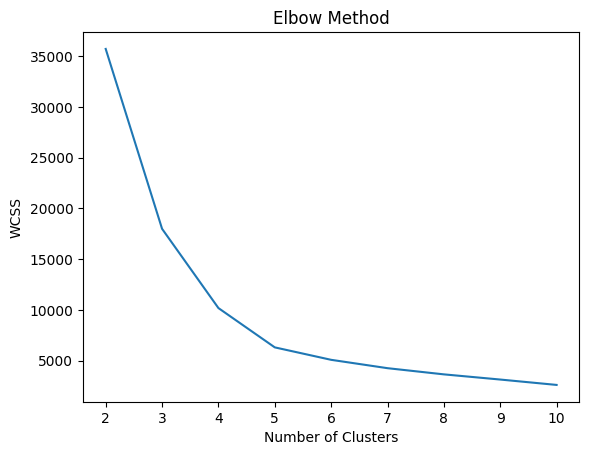

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of cluster numbers
min_clusters = 2
max_clusters = 10

# Initialize an empty list to store the WCSS values
wcss = []

# Perform clustering for different numbers of clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Create a KMeans instance with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=100, max_iter=1000)
    
    # Fit the distance matrix to the KMeans model
    kmeans.fit(distance_df)
    
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(min_clusters, max_clusters+1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [26]:
# Create a KMeans instance with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=100, max_iter=1000)

# Fit the distance matrix to the KMeans model
kmeans.fit(distance_df)

# Get the cluster labels for each station
cluster_labels = kmeans.labels_

# Add the cluster labels to the distance dataframe
distance_df['Cluster'] = cluster_labels

# Print the number of stations in each cluster
print(distance_df['Cluster'].value_counts())



Cluster
1    57
2    48
3    16
0     5
Name: count, dtype: int64


In [27]:
print(distance_df['Cluster'])

2001000    2
2001025    1
2001030    1
2001500    2
2001738    2
          ..
2106750    1
2106800    1
2106850    1
2106900    1
2107600    1
Name: Cluster, Length: 126, dtype: int32


In [28]:
# Retrieve the coordinates of the stations. All the coordinates use the Lambert 93 projection.
coord_stations = pd.read_csv("./naiades_export_orthophosphate/Stations.CSV",sep=";", usecols=['CdStationMesureEauxSurface', 'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface'])

In [29]:
# Keep only the stations that we used for the clustering
coord_stations = coord_stations[coord_stations['CdStationMesureEauxSurface'].isin(shared_station)]

In [30]:
clustering_results = distance_df['Cluster'].to_frame()

In [31]:
# When converting the results of the clustering into a pandas dataframe, the CdStationMesureEauxSurface were considered as indexes
# We interpret them as column
clustering_results['CdStationMesureEauxSurface'] = clustering_results.index

In [32]:
clustering_results

,Cluster,CdStationMesureEauxSurface
2001000,2,2001000
2001025,1,2001025
2001030,1,2001030
2001500,2,2001500
2001738,2,2001738
...,...,...
2106750,1,2106750
2106800,1,2106800
2106850,1,2106850
2106900,1,2106900


In [33]:
merged_df = pd.merge(coord_stations, clustering_results, on='CdStationMesureEauxSurface')

In [34]:
merged_df.head()

,CdStationMesureEauxSurface,CoordXStationMesureEauxSurface,CoordYStationMesureEauxSurface,Cluster
0,2098800,1002076,6885722,1
1,2001000,1038791,6736177,2
2,2001025,1028974,6740387,1
3,2001030,1030170,6741973,1
4,2001500,1046252,6813302,2


In [35]:
from pyproj import Transformer

In [36]:
# Transform from Lambert 93 to Latitude / Longitude
latitude_list = []
longitude_list = []
for index in merged_df.index:
    transformer = Transformer.from_crs("EPSG:2154", "EPSG:4326")
    coord = transformer.transform(merged_df['CoordXStationMesureEauxSurface'][index], merged_df['CoordYStationMesureEauxSurface'][index])
    latitude_list.append(coord[0])
    longitude_list.append(coord[1])
merged_df['latitude'] = latitude_list
merged_df['longitude'] = longitude_list
del merged_df['CoordXStationMesureEauxSurface']
del merged_df['CoordYStationMesureEauxSurface']

In [37]:
merged_df.head()

,CdStationMesureEauxSurface,Cluster,latitude,longitude
0,2098800,1,49.000299,7.130219
1,2001000,2,47.638792,7.514387
2,2001025,1,47.681603,7.386962
3,2001030,1,47.695258,7.404056
4,2001500,2,48.327773,7.674344


In [85]:
# pip install geopandas
# pip install folium

import folium
import geopandas as gpd
from folium.plugins import MarkerCluster

# Instanciating the world map
world = gpd.read_file('world.shp')

# Centering the map on France. An index represents a file. France seems to be around 127
map_ = folium.Map(location=[world.geometry.centroid.y.values[127], world.geometry.centroid.x.values[127]],
               zoom_start=6)

# A MarkerCluster is used to add cities to the map
# marker_cluster = MarkerCluster().add_to(map_)

for index, city in merged_df.iterrows():
    color = 'blue'
    if city['Cluster'] == 0.0:
        color = 'red'
    elif city['Cluster'] == 1.0:
        color = 'white'
    elif city['Cluster'] == 2.0:
        color = 'green'
    elif city['Cluster'] == 3.0:
        color = 'black'
    folium.Marker([city['latitude'], city['longitude']], icon=folium.Icon(color=color)).add_to(map_)
    # folium.Marker([city['latitude'], city['longitude']], icon=folium.Icon(color=color)).add_to(maker_cluster)
map_
